# BIOS512 Assignment #4

🌬 For this assignment we are going to work with [Canada wind turbine](https://github.com/rfordatascience/tidytuesday/blob/master/data/2020/2020-10-27/readme.md) data from TidyTuesday. 💨

Use `read_csv` to load the data from the TidyTuesday GitHub repository. The project URL is can be found at [https://github.com/rfordatascience/tidytuesday/blob/master/data/2020/2020-10-27/](https://github.com/rfordatascience/tidytuesday/blob/master/data/2020/2020-10-27/).

In [2]:
library('tidyverse')

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [3]:
wind = read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/refs/heads/master/data/2020/2020-10-27/wind-turbine.csv')

wind |> head()
wind |> glimpse()

Rows: 6698 Columns: 15
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (8): province_territory, project_name, turbine_identifier, turbine_numbe...
dbl (7): objectid, total_project_capacity_mw, turbine_rated_capacity_k_w, ro...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


objectid,province_territory,project_name,total_project_capacity_mw,turbine_identifier,turbine_number_in_project,turbine_rated_capacity_k_w,rotor_diameter_m,hub_height_m,manufacturer,model,commissioning_date,latitude,longitude,notes
<dbl>,<chr>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>
1,Alberta,Optimist Wind Energy,0.90,OWE1,1/2,150,23,30,Bonus,AN 150/30,1993,49.52535,-114.0548,NA
2,Alberta,Castle River Wind Farm,44.00,CRW1,1/60,600,44,40,Vestas,V44/600,1997,49.51264,-114.0357,NA
3,Alberta,Waterton Wind Turbines,3.78,WWT1,1/6,600,44,50,Vestas,V44/600,1998,49.23307,-113.6549,NA
4,Alberta,Waterton Wind Turbines,3.78,WWT2,2/6,600,44,50,Vestas,V44/600,1998,49.23303,-113.6302,NA
5,Alberta,Waterton Wind Turbines,3.78,WWT3,3/6,600,44,50,Vestas,V44/600,1998,49.21755,-113.6802,NA
6,Alberta,Waterton Wind Turbines,3.78,WWT4,4/6,660,47,50,Vestas,V47/660,2000,49.21773,-113.6579,NA


Rows: 6,698
Columns: 15
$ objectid                   <dbl> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, …
$ province_territory         <chr> "Alberta", "Alberta", "Alberta", "Alberta",…
$ project_name               <chr> "Optimist Wind Energy", "Castle River Wind …
$ total_project_capacity_mw  <dbl> 0.90, 44.00, 3.78, 3.78, 3.78, 3.78, 19.50,…
$ turbine_identifier         <chr> "OWE1", "CRW1", "WWT1", "WWT2", "WWT3", "WW…
$ turbine_number_in_project  <chr> "1/2", "1/60", "1/6", "2/6", "3/6", "4/6", …
$ turbine_rated_capacity_k_w <dbl> 150, 600, 600, 600, 600, 660, 1300, 1300, 1…
$ rotor_diameter_m           <dbl> 23, 44, 44, 44, 44, 47, 60, 60, 60, 60, 60,…
$ hub_height_m               <dbl> 30, 40, 50, 50, 50, 50, 46, 46, 46, 46, 46,…
$ manufacturer               <chr> "Bonus", "Vestas", "Vestas", "Vestas", "Ves…
$ model                      <chr> "AN 150/30", "V44/600", "V44/600", "V44/600…
$ commissioning_date         <chr> "1993", "1997", "1998", "1998", "1998", "20…
$ latitude      

Each row in the table represents a single turbine.

Make a bar chart 📊 **sorted by frequency** of turbine count per province territory. (Hint: `fct_infreq` will sort your factor levels by frequency for subsequent plotting)

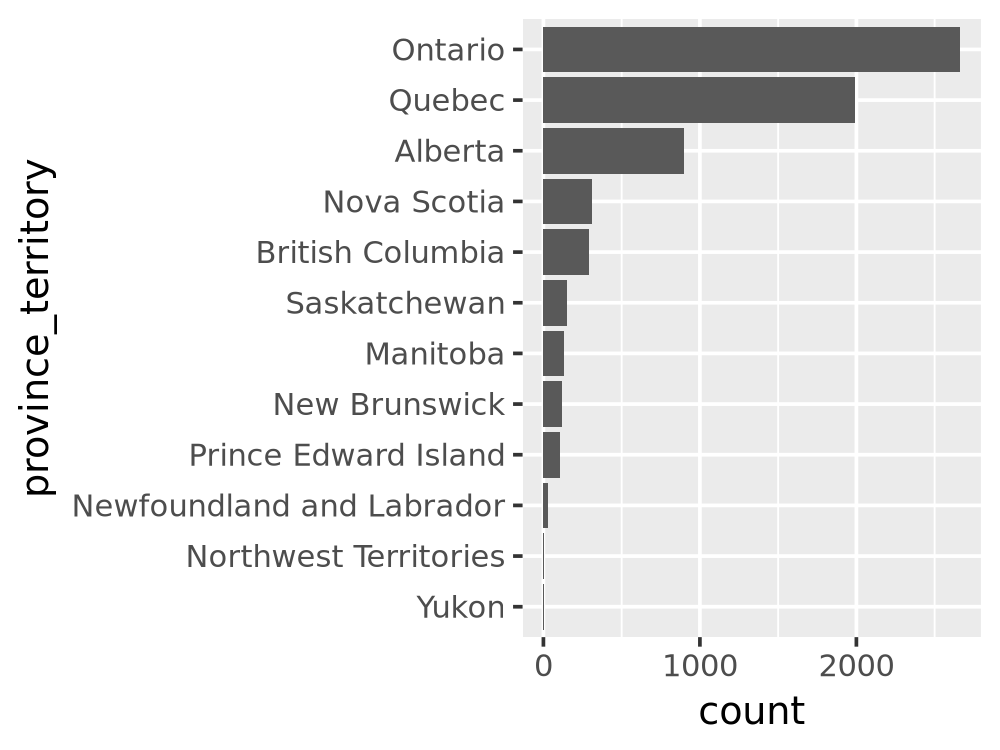

In [4]:
#see 11_00_forecats_practice for fct_infreq and fct_rev syntax 
#note fct_infreq & fct_rev need to be in mutate 

wind |>
   mutate(province_territory = fct_infreq(province_territory) |> fct_rev()) |>
   ggplot(aes(y = province_territory)) + geom_bar()

Make a bar chart **sorted by frequency** of turbine count per manufacturer. **Group the low frequency manufacturers into an `Other` category**.

**Bonus:** Can you force the `Other` category to be the last bar? 

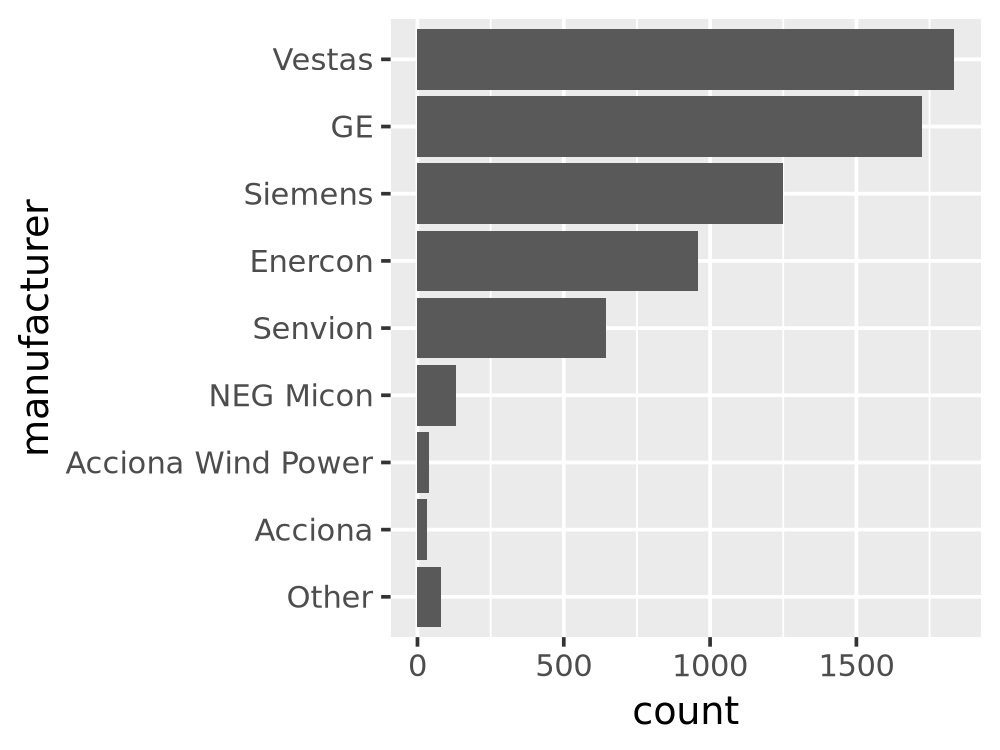

In [8]:
#don't forget we need fct lump to relevel 
#relevel creates other category and forces it to be at the bottom
#n=8 is how many levels to show before grouping rest into other 

wind |>
   mutate(manufacturer = fct_infreq(manufacturer)) |> 
    mutate(manufacturer = fct_lump(manufacturer, n=8) |>
          fct_relevel('Other', after= Inf) |>
            fct_rev() 
         ) |>
   ggplot(aes(y = manufacturer)) + geom_bar() 

Let's make a map of where each turbine is located. 🗺️

In the cell below ⬇️ load the `mapdata` package.

In [9]:
library('mapdata')

Loading required package: maps


Attaching package: ‘maps’


The following object is masked from ‘package:purrr’:

    map




Now we can retrieve the "data" for a map of Canada. Run this code:

In [10]:
canada = map_data('world', region='Canada')  

Are the column names for `latitude` and `longitude` the same for your Canada map data and the turbine data?

In [11]:
canada |> glimpse()

Rows: 11,573
Columns: 6
$ long      <dbl> -59.78760, -59.92227, -60.03775, -60.11426, -60.11748, -59.9…
$ lat       <dbl> 43.93960, 43.90391, 43.90664, 43.93911, 43.95337, 43.93960, …
$ group     <dbl> 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, …
$ order     <int> 1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 12, 13, 14, 15, 16, 18, 19, 2…
$ region    <chr> "Canada", "Canada", "Canada", "Canada", "Canada", "Canada", …
$ subregion <chr> "Sable Island", "Sable Island", "Sable Island", "Sable Islan…


The column names for latitude and longitude in the turbine data is **latitute/longitude** 
but in the Canada map data it is **lat/long**.

They are different. 

The code below creates a map of Canada. Modify the code to add the turbine locations. 

❗️ **Hint:** use `geom_point`. Remember to, 
1. define encodings inside of `geom_point` that work for the **turbine data**, and
2. to override the data in `geom_point` to use the **turbine data** instead of the **Canada map data**. ❗️

[This](https://github.com/chuckpr/BIOS512/blob/main/assignments/2024/map.png?raw=true) is what the map should look like...

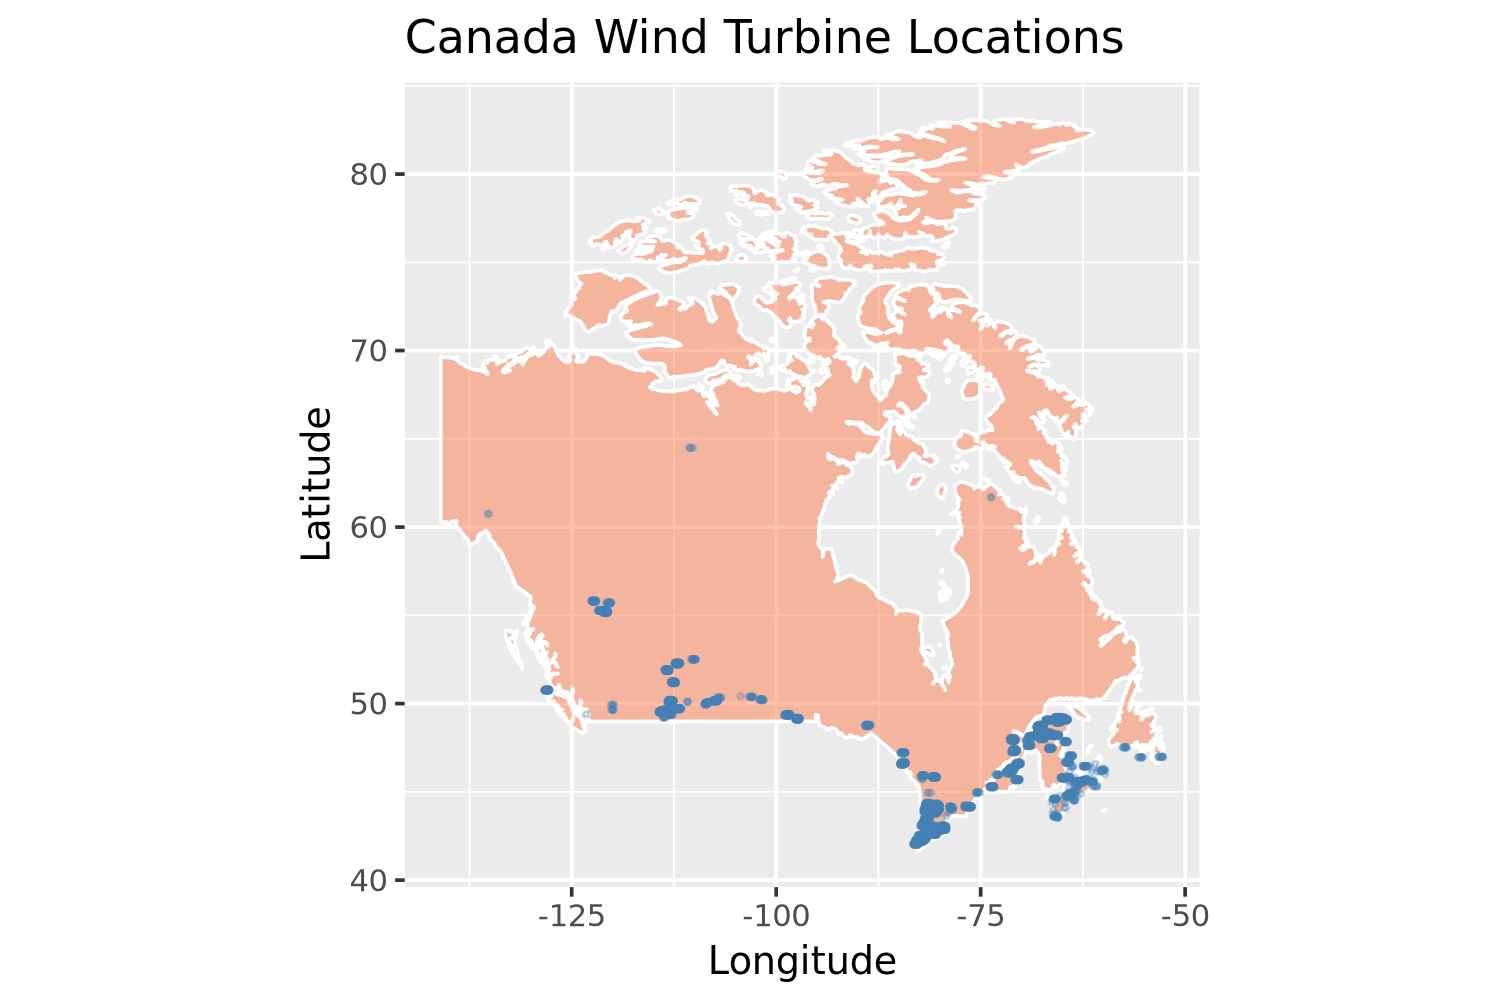

In [49]:
options(repr.plot.res = 250, repr.plot.height = 4, repr.plot.width = 6)

ggplot(data = canada) + 
    geom_polygon(aes(x = long, y = lat, group = group), fill = 'coral', color = "white", alpha = 0.5) + 
    coord_quickmap() +
    geom_point(data = wind, aes(x = longitude, y = latitude), color = 'steel blue', position = position_jitter(width = 0.3, height = 0), alpha = 0.25, size=0.5) +
    theme(legend.position = "none") +
    labs(x = "Longitude", y = "Latitude") +
    ggtitle("Canada Wind Turbine Locations")
